#### Loan Default Prediction using ML 

Model B: Random Forests for Classification Model

We experimented with Random Forest hyperparameters— specifically the number of trees (n_estimators) and tree depth (max_depth)— to improve model performance. Increasing the number of trees from 1 to 300 showed diminishing returns, with the AUC peaking around 0.627. Limiting tree depth to 15 improved performance and reduced overfitting, achieving the best AUC of 0.65. Overall, tuning hyperparameters carefully can boost performance, but more is not always better.

#### Import Packages and Data

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 30 18:23:15 2024

@author: Felipe J.

Loan Defaultl Prediction with ML pt. 6, Classification with Random Forest
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix

loan_df = pd.read_csv('/Users/pjaram84/Desktop/Independent Pursuits/Machine Learning with CFI/Loan Default Prediction ML/data/vehicle_loans_feat.csv',
                      index_col='UNIQUEID')

In [8]:
#%% Convert categorical features to 'categorical' data type
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT',
                'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

#%% One Hot Encode Rapidly
loan_df_enc = pd.get_dummies(loan_df, prefix_sep='_ _ _')

#%% Building the Random Forest   
X = loan_df_enc.drop(columns=['LOAN_DEFAULT'])
y = loan_df_enc['LOAN_DEFAULT']
    
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=84)
    
rforest_classifier = RandomForestClassifier() # Initialize
rforest_classifier.fit(x_train, y_train)      # Fit with training data.



RandomForestClassifier()

#### Evaluate Random Forest Classifier, reusable code function

In [9]:
#%% Evaluate
# Get eval_model function we deined ealrier (to evaluate binary models' performance).
def eval_model(model_name, x_test, y_test):  
    predictions = model_name.predict(x_test) 
    probs = model_name.predict_proba(x_test) 
    
    # Metrics (Scores)
    accuracy = model_name.score(x_test, y_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions) 
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f1 score:", f1)
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(model_name, x_test, y_test)
    
    tn = conf_mat[0][0]  # True Negatives 
    fp = conf_mat[0][1]  # False Positives
    fn = conf_mat[1][0]  # False Negatives 
    tp = conf_mat[1][1]  # True Positives
    print ("True Negatives (Correct Non-Defaults):", tn)    
    print ("False Positives (Incorrect Defaults):", fp)    
    print ("False Negatives (Incorrect Non-Defaults):", fn) 
    print ("True Positives (Correct Defaults):", tp) 
    
    # The ROC curve
    probs_df = pd.DataFrame()           
    probs_df['Prob. (0)'] = probs[:, 0]     
    probs_df['Prob. (1)'] = probs[:, 1] 
    print(probs_df.describe())           
    
    fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)              
    print("Area under ROC curve (AUC):", roc_auc)
    
    plt.figure(2)                        
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='TPR=FPR line')     
    plt.xlim([0, 1])                     
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right") 
    plt.show()
    
    # Prediction Percentages
    results_df = pd.DataFrame()                         
    results_df['true_class'] = y_test               
    results_df['predicted_class'] = list(predictions)   
    results_df['default_prob'] = probs[:, 1]   
    pred_percentages = results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)
    print(pred_percentages)
    # We can evaluate performance with: eval_model(model_name, x_test, y_test) 

Accuracy: 0.9996354336998654
Precision: 0.9994568303582451
Recall: 0.9988649542280456
f1 score: 0.9991608046402567


/Users/pjaram84/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


True Negatives (Correct Non-Defaults): 145974
False Positives (Incorrect Defaults): 22
False Negatives (Incorrect Non-Defaults): 46
True Positives (Correct Defaults): 40481
           Prob. (0)      Prob. (1)
count  186523.000000  186523.000000
mean        0.779764       0.220236
std         0.273224       0.273224
min         0.000000       0.000000
25%         0.830000       0.050000
50%         0.910000       0.090000
75%         0.950000       0.170000
max         1.000000       1.000000
Area under ROC curve (AUC): 0.9999892198964363


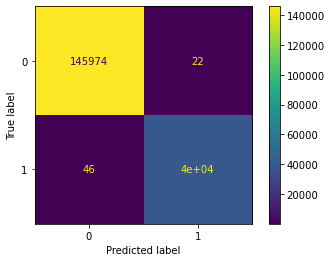

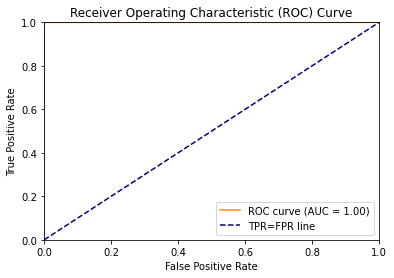

true_class  predicted_class
0           0                  0.999849
            1                  0.000151
1           1                  0.998865
            0                  0.001135
Name: predicted_class, dtype: float64


In [10]:
#%% Identifying Overfitting in our Results
eval_model(rforest_classifier, x_train, y_train)            # If we run our model evaluation function, but using our training data, we can easily
    # Accuracy, Precision, Recall, and F1, are all 99%.     # see that we're overfitting to training data. We get nearly perfect results in train data.
    # ROC curve has auc of nearly one, that is the curve is sticked to y-axis and top part of graph. 
    # Overfitted to training data..   

#### Hyperparameters and Hyperparameter Tuning

In [12]:
#%% Hyperparameters and Hyperparameter Tunning                     # Default decision trees in RF for sklearn is n=100.

# Number of Trees (Forest Size)                                    # Trees can add valuable data, but also computation cost and overfitting.
'rforest_classifier_n1 = RandomForestClassifier(n_estimators=1)'  
'rforest_classifier_n1.fit(x_train, y_train)'                      # Poor performance w/ one deciosion tree.              
                                                                   # roc_auc is 0.52. Which is near 0.50, the same as random 50/50 guessing

'rforest_classifier_n10 = RandomForestClassifier(n_estimators=10)'  # This one is better. roc_auc = 0.58.
'rforest_classifier_n10.fit(x_train, y_train)'                      # However, model is unstable and not as good as w/ default 100 estimators.

rforest_classifier_n300 = RandomForestClassifier(n_estimators=300) # Better. This model's roc_auc is 0.627 which is only 0.007 better than our model with n=100
rforest_classifier_n300.fit(x_train, y_train)                      # estimators. This demonstrates more decision trees insn't always better and way more computationally expensive.
   
    # Increasing forest's size may help our model performance. But up until a certain point.   
    # All models were evlauated and compared w/ our eval_model() function.
    
    # in practice, we could run optimization algorithms to find the optimal combination of hyperparameters. This ventures into the science of Optimization...

# Maximum Depth (Longest path in Decision Trees between Root Node and Leaf Node(s)).      # The defualt value of max_depth is None (i.e not limited).
'rforest_classifier_d5 = RandomForestClassifier(max_depth=5)'                             # This can be the source of our overfitting.
'rforest_classifier.fit(x_train, y_train)' # AUC of 0.61. Not too bad, but we're predicting almost everything as non defualt (loan). 
                                           # NOTE: Model performing similarly with (x_train, y_train) and (x_test, y_test) i.e we are reducing  overfitting.
                                         
rforest_classifier_d15 = RandomForestClassifier(max_depth=15)      # Best model we've seen thus far.              
rforest_classifier.fit(x_train, y_train)                           # AUC = 0.65 best ability in separating classes.

' \nSummary:\n- We built a Random Forest classification model. \n- Tunned and experimented distinct hyperparameters to increase performance.\n    * Size of the Forest\n    * Depth of the Trees\n- Reused model evaluation function from earlier files to assess our models.\n'

#%% Summary

We experimented with Random Forest hyperparameters— specifically the number of trees (n_estimators) and tree depth (max_depth)— to improve model performance. Increasing the number of trees from 1 to 300 showed diminishing returns, with the AUC peaking around 0.627. Limiting tree depth to 15 improved performance and reduced overfitting, achieving the best AUC of 0.65. Overall, tuning hyperparameters carefully can boost performance, but more is not always better.